# South African Language Identification
   EDSA 2022 Classification Hackathon

### BY ETENG UKET EFFIOM

## Challenge description 

We are required to use NLP's Language Identification to classify a given text into one of the 11 Official South African Languages, determining the natural language that a piece of text is written in.

## Notebook Outline

1. Package Installation
2. Importing Libraries
3. Loading the Data
4. Data Cleaning and Formating
5. Exploratory Data Analysis
6. Moddel
9. Submission

## 1. Package Installation

All the packages required has been installed already

## 2. Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
#import nltk
from nltk.tokenize import sent_tokenize
from sklearn.model_selection import train_test_split
import re

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 3. loading the data 

In [2]:
df_train = pd.read_csv("train_set.csv")
df_test = pd.read_csv("test_set.csv")

### 3.1 Viewing the Data

In [3]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


### 4. Data Cleaning and Formating

In [5]:
df_train.info

<bound method DataFrame.info of       lang_id                                               text
0         xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1         xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2         eng  the province of kwazulu-natal department of tr...
3         nso  o netefatša gore o ba file dilo ka moka tše le...
4         ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...
...       ...                                                ...
32995     tsn  popo ya dipolateforomo tse ke go tlisa boetele...
32996     sot  modise mosadi na o ntse o sa utlwe hore thaban...
32997     eng  closing date for the submission of completed t...
32998     xho  nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999     sot  mafapha a mang le ona a lokela ho etsa ditlale...

[33000 rows x 2 columns]>

In [6]:
df_test.info

<bound method DataFrame.info of       index                                               text
0         1  Mmasepala, fa maemo a a kgethegileng a letlele...
1         2  Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2         3         Tshivhumbeo tshi fana na ngano dza vhathu.
3         4  Kube inja nelikati betingevakala kutsi titsini...
4         5                      Winste op buitelandse valuta.
...     ...                                                ...
5677   5678                   You mark your ballot in private.
5678   5679  Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679   5680  E Ka kopo etsa kgetho ya hao ka hloko, hobane ...
5680   5681  TB ke bokudi ba PMB, mme Morero o tla lefella ...
5681   5682              Vakatjhela iwebhusayidi yethu ku-www.

[5682 rows x 2 columns]>

### unique values per language category

In [7]:
df_train['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [8]:
df_train['text_'] = df_train['text'].str.lower()
df_test['text_'] = df_test['text'].str.lower ()

In [9]:
def removing_punctuations(data):

    words = str.maketrans('', '')
    return data.translate(words)
df_train['text_'] = df_train.text_.apply(lambda x: removing_punctuations(x))
df_test['text_'] = df_test.text_.apply(lambda x: removing_punctuations(x))

In [10]:
def text(data):
    text = re.sub(r'[09]', '',text)

## 5. Exploratory Data Analysis

In [11]:
# Checking whether a character is white-space character or not
print(len(df_train['text']))
print(sum(df_train['text'].apply(lambda x: x.isspace())))

33000
0


Text(0.5, 1.0, 'Distribution')

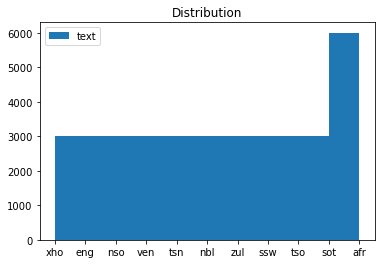

In [12]:
# Visualizing the distribution of the target 
plt.hist(df_train['lang_id'], label='text');
plt.legend();
plt.title('Distribution')

## 6. Modelling

In [13]:
X = df_train['text']
y = df_train['lang_id']

In [14]:
# Use 80% of the train set to train the model, 20% to validate.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [15]:
tree = Pipeline([('tfidf', TfidfVectorizer()),('tree', DecisionTreeClassifier()),])
rfc = Pipeline([('tfidf', TfidfVectorizer()), ('rfc', RandomForestClassifier())])
ridge = Pipeline([('tfidf', TfidfVectorizer()), ('Ridge', RidgeClassifier())])
Lsvc = Pipeline([('tfidf', TfidfVectorizer()), ('scv', LinearSVC()),])
logreg = Pipeline([('tfidf', TfidfVectorizer()),('logistic', LogisticRegression()),])
SGD = Pipeline([('tfidf', TfidfVectorizer()), ('SGD', SGDClassifier())])
svc = Pipeline([('tfidf', TfidfVectorizer()), ('SVC', SVC())])
MNB = Pipeline([('tfidf', TfidfVectorizer()), ('MNB', MultinomialNB())])

In [16]:
tree.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('tree', DecisionTreeClassifier())])

In [17]:
# training the RandomForest pipleline
rfc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier())])

In [18]:
ridge.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('Ridge', RidgeClassifier())])

In [ ]:
svc.fit(X_train, y_train)

In [ ]:
logreg.fit(X_train, y_train)

In [ ]:
Lsvc.fit(X_train, y_train)

In [ ]:
SGD.fit(X_train, y_train)

In [ ]:
nbm.fit(X_train, y_train)

### model prediction

### Desicion Tree classifier

In [ ]:
predictions = tree.predict(X_test)
confusion_matrix(predictions, y_test)

### model performance

In [ ]:
print(classification_report(y_test, predictions))

### Random Forest Classifier 

In [ ]:
predictions = rfc.predict(X_test)
confusion_matrix(predictions, y_test)

### model performance

In [ ]:
print(classification_report(y_test, predictions))

### Ridge Classifier

In [ ]:
predictions = ridge.predict(X_test)
confusion_matrix(predictions, y_test)

### model performance

In [ ]:
print(classification_report(y_test, predictions))

### SVC

In [ ]:
predictions = svc.predict(X_test)
confusion_matrix(predictions, y_test)

### model performance

In [ ]:
print(classification_report(y_test, predictions))

### LogisticRegression

In [ ]:
predictions = logreg.predict(X_test)
confusion_matrix(predictions, y_test)

### model performance

In [ ]:
print(classification_report(y_test, predictions))

### LinearSVC

In [ ]:
predictions = Lsvc.predict(X_test)
confusion_matrix(predictions, y_test)

### model performance

In [ ]:
print(classification_report(y_test, predictions))

### SGDClassifier

In [ ]:
predictions = SGD.predict(X_test)
confusion_matrix(predictions, y_test)

### model performance

In [ ]:
print(classification_report(y_test, predictions))

### MultinomialNB

In [ ]:
predictions = MNB.predict(X_test)
confusion_matrix(predictions, y_test)

In [ ]:
print(classification_report(y_test, predictions))

## 7. Submission

In [ ]:
test  = df_test['text']
pred = MNB.predict(test)

In [ ]:
#kaggle submission

submission = pd.DataFrame(
    {'index' : df_test['index'],
     'lang_id': pred
    })

submission.to_csv('Dimakatso_Mongwegelwa_Classification_Hack.csv', index=False)

In [ ]:
submission